If on google collab, if not skip the following cell



In [1]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/TFG_Matematicas'

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content/gdrive/MyDrive/TFG_Matematicas


## EDA

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import os
import random
from utils.utils import *

## Loading the data

In [5]:
data_indexes = [(i+1,j+1) for i in range(10) for j in range(2000)]

In [6]:
identify_nan = False #Set to true to generate a file of discarded indexes containing unstable solutions and move those files to a discarded folder
idx_discard = set()

if identify_nan:
    #Identify data with NaN and big values to discard them
    for idx in data_indexes:
        print(idx)
        if idx not in [(6,1995)]:
            mat = np.loadtxt(f'./datos_tfg/datos_tfg/tfg_datos_{idx[0]}_{idx[1]}.txt')
            if np.isnan(mat[-1]).any() or (mat[-1] > 2).any():
                idx_discard.add(idx)

    #Save de indexes
    with open('utils/idx_nan.txt', 'w') as f:
        for idx in idx_discard:
            f.write(f"{idx[0]}, {idx[1]}\n")


with open('./utils/idx_nan.txt', 'r') as f:
    for line in f:
        idx = line.strip().split(',')
        idx_discard.add((int(idx[0]), int(idx[1].strip())))

if identify_nan:
    for idx in idx_discard:
        old_path = f"./datos_tfg/datos_tfg/tfg_datos_{idx[0]}_{idx[1]}.txt"
        new_path = f"./discarded/tfg_datos_{idx[0]}_{idx[1]}.txt"
        os.rename(old_path, new_path)
        print(f"success with {idx[0]}_{idx[1]}")

In [7]:
parameters = load_parameter_list()

In [8]:
df_parameters = pd.DataFrame(parameters, columns=['cx', 'cy', 'a', 'b', 'theta', 'e1', 'e2'])
df_parameters['data_index'] = data_indexes
df_parameters = df_parameters[~df_parameters['data_index'].isin(idx_discard)]
df_parameters.reset_index(inplace = True, drop = True)

## Parameters analysis

In [9]:
print(f'There are {len(df_parameters)} combination of parameters.')

There are 14095 combination of parameters.


In [10]:
df_parameters.drop(['data_index'], axis=1).describe().transpose().drop(['25%','75%'], axis=1)

,count,mean,std,min,50%,max
cx,14095.0,0.491089,1.000278,-3.102034,0.484257,4.378377
cy,14095.0,3.516789,0.979499,0.276241,3.495380,7.286987
a,14095.0,1.336873,0.557607,0.015081,1.306716,4.032865
b,14095.0,0.545701,0.385524,0.000054,0.480646,2.429068
theta,14095.0,0.199985,0.318171,-1.009230,0.198414,1.435599
e1,14095.0,2.609427,1.587890,0.000006,2.460382,11.031250
e2,14095.0,4.069265,2.244379,0.000887,4.056292,13.713040


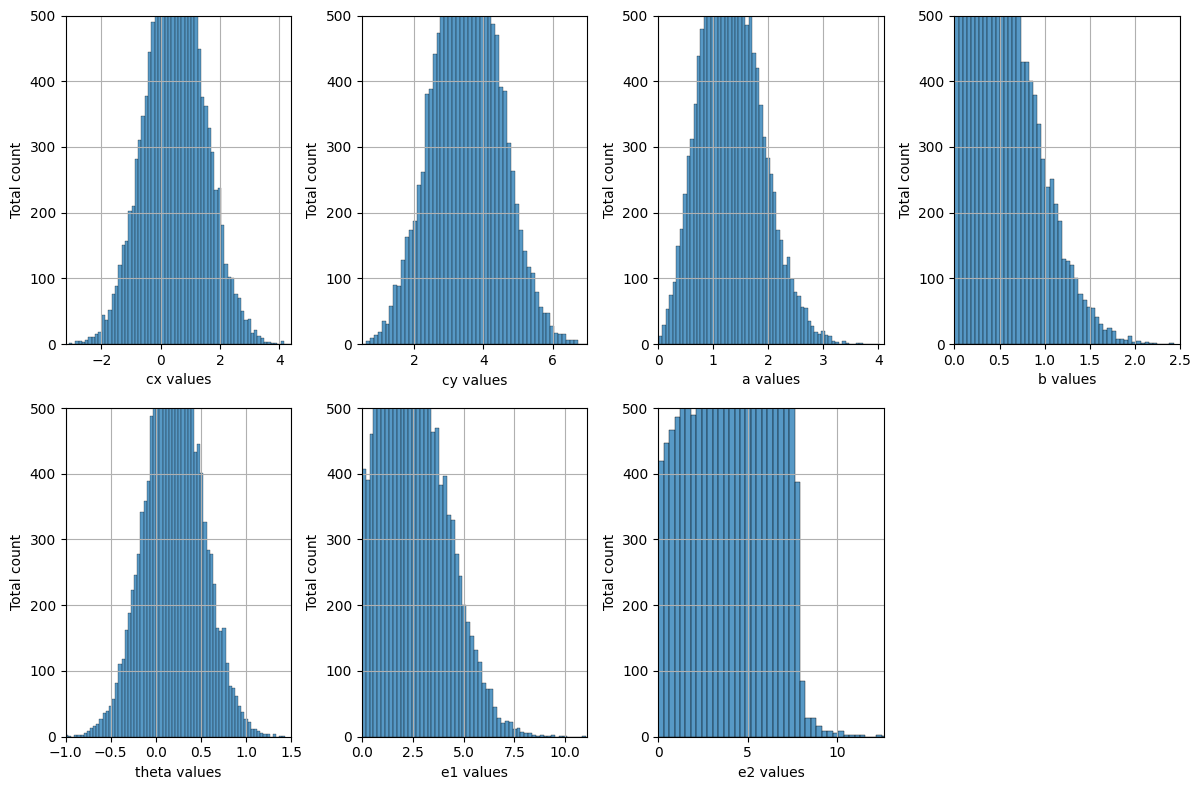

In [11]:
visualize_parameter_distributions(df_parameters, 500)

## Visualizing training data

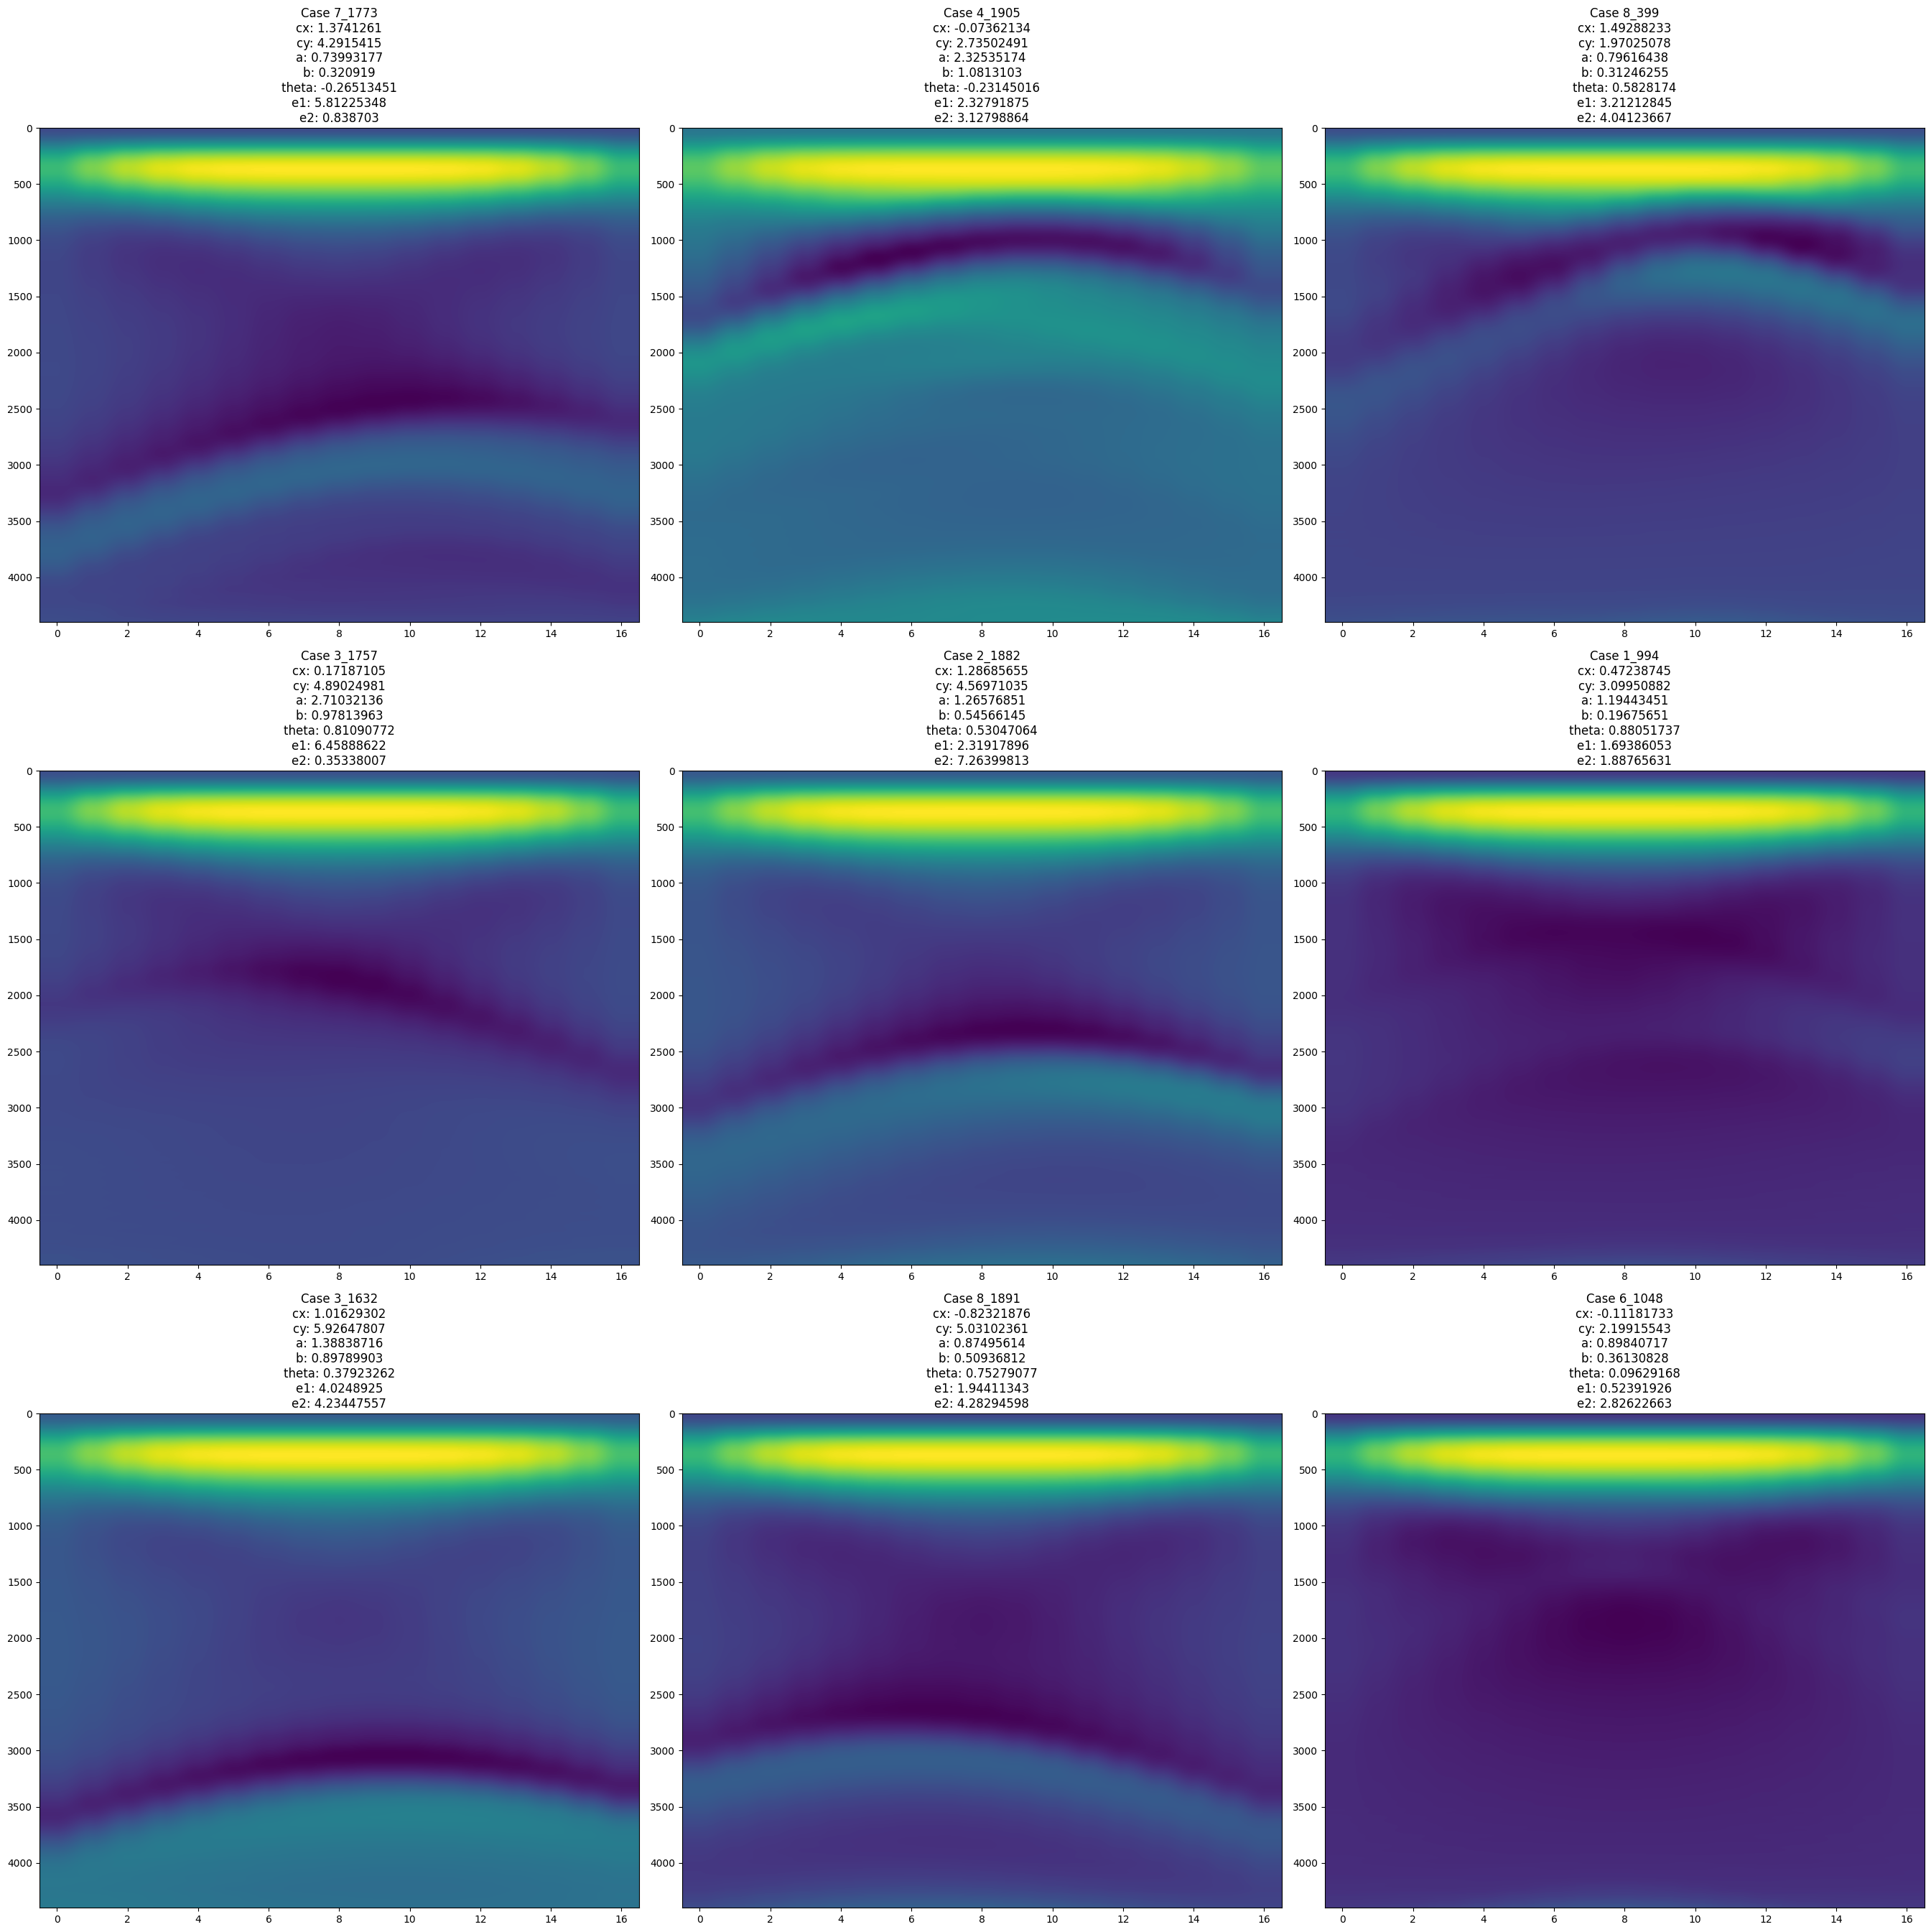

In [24]:
n = 9
idx_viz = []
for i in range(n):
    idx_1 = random.randint(1,10)
    idx_2 = random.randint(1,2000)
    while (idx_1, idx_2) in idx_discard:
        idx_1 = random.randint(1,5)
        idx_2 = random.randint(1,2000)
    idx_viz.append((idx_1,idx_2))

visualize(idx_viz, df_parameters, cols = 3)

## Preprocessing

In [25]:
pip install iterative-stratification


In [26]:
from iterstrat.ml_stratifiers import MultilabelStratifiedKFold

In [27]:
X = pd.DataFrame(df_parameters['data_index'])
y = df_parameters.drop(['data_index'], axis=1)

In [28]:
mskf = MultilabelStratifiedKFold(n_splits=5, shuffle = True, random_state=0)
X.loc[:, 'fold'] = -1
y.loc[:, 'fold'] = -1

In [29]:
for fold_ , (train_, valid_) in enumerate(mskf.split(X=X, y=y)):
    X.loc[valid_, 'fold'] = fold_
    y.loc[valid_, 'fold'] = fold_

------------- FOLD 0 -------------
        count      mean       std       min       50%        max
cx     2819.0  0.517344  1.009216 -2.830086  0.510157   4.130790
cy     2819.0  3.541421  0.986974  0.276241  3.543008   6.712479
a      2819.0  1.333745  0.559505  0.069034  1.299678   3.851698
b      2819.0  0.541835  0.379639  0.000130  0.476047   2.204865
theta  2819.0  0.201946  0.322948 -1.009230  0.205865   1.435599
e1     2819.0  2.586933  1.578865  0.004928  2.444211   9.153356
e2     2819.0  4.077271  2.271732  0.000887  4.090045  13.713040
fold   2819.0  0.000000  0.000000  0.000000  0.000000   0.000000


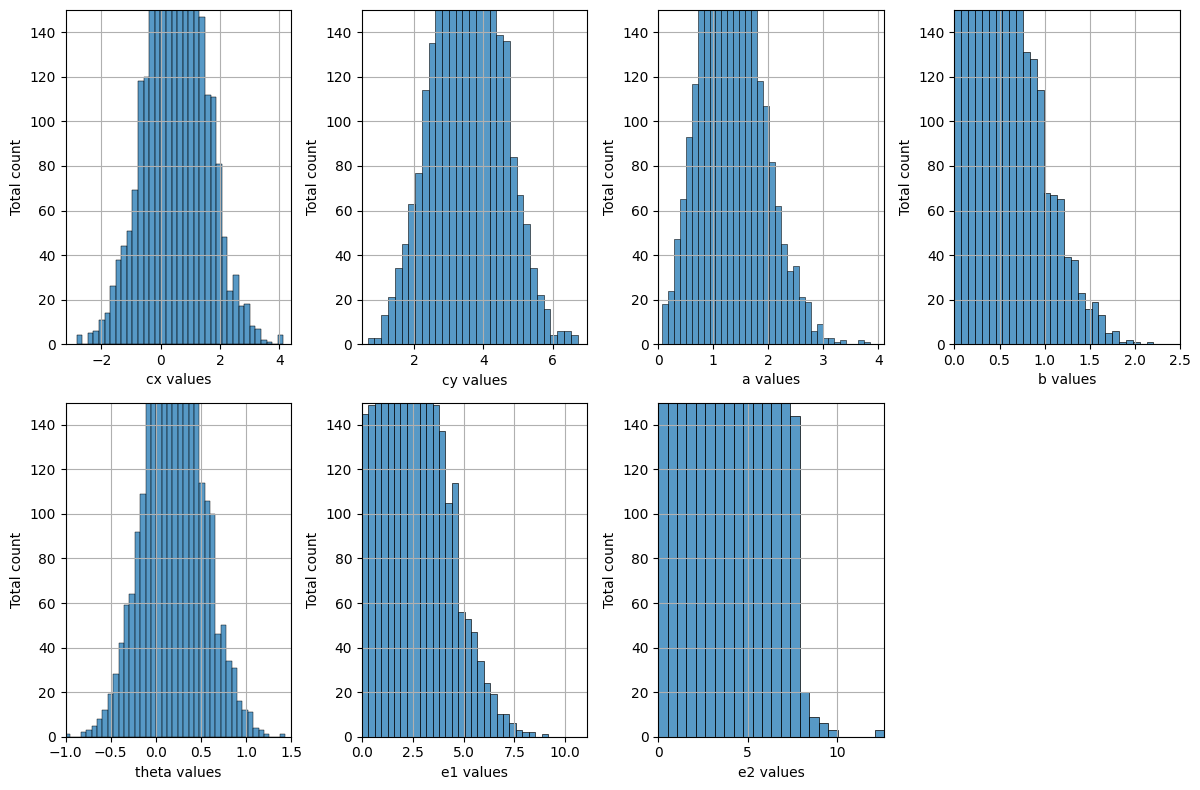

------------- FOLD 1 -------------
        count      mean       std       min       50%        max
cx     2819.0  0.495819  0.983609 -3.023943  0.477549   3.639673
cy     2819.0  3.497126  0.973025  0.572812  3.469215   6.650664
a      2819.0  1.344036  0.550221  0.032472  1.312814   3.364093
b      2819.0  0.545456  0.380409  0.000844  0.481143   2.177653
theta  2819.0  0.195266  0.308696 -0.838067  0.195178   1.373240
e1     2819.0  2.631686  1.582775  0.000006  2.467407   8.869764
e2     2819.0  4.064446  2.219250  0.001369  4.050560  10.819757
fold   2819.0  1.000000  0.000000  1.000000  1.000000   1.000000


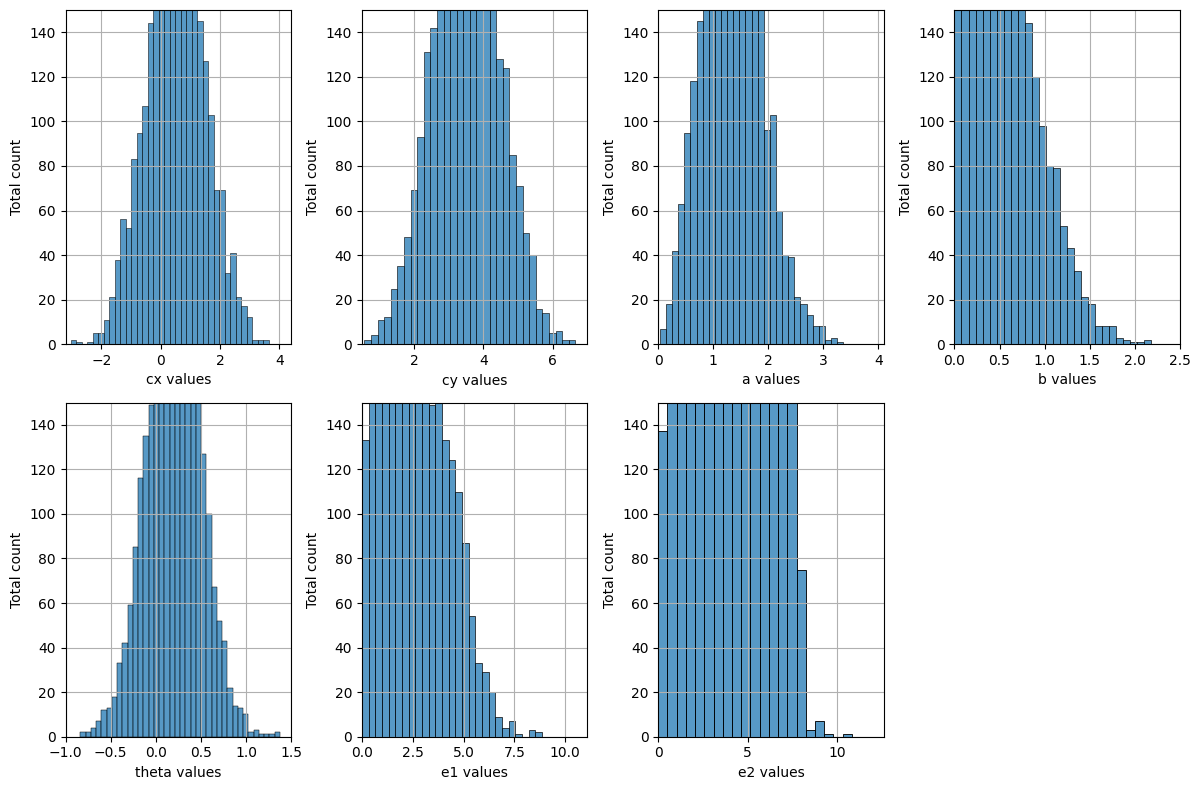

------------- FOLD 2 -------------
        count      mean       std       min       50%        max
cx     2819.0  0.485607  1.013913 -2.606321  0.491565   4.138670
cy     2819.0  3.533735  0.972081  0.687987  3.500200   6.764944
a      2819.0  1.336184  0.553983  0.015081  1.312443   3.462639
b      2819.0  0.549406  0.387806  0.000287  0.490060   2.219840
theta  2819.0  0.203361  0.320938 -0.977577  0.209364   1.248117
e1     2819.0  2.627955  1.588850  0.006716  2.475739   8.055187
e2     2819.0  4.081018  2.238982  0.002375  4.060172  11.214868
fold   2819.0  2.000000  0.000000  2.000000  2.000000   2.000000


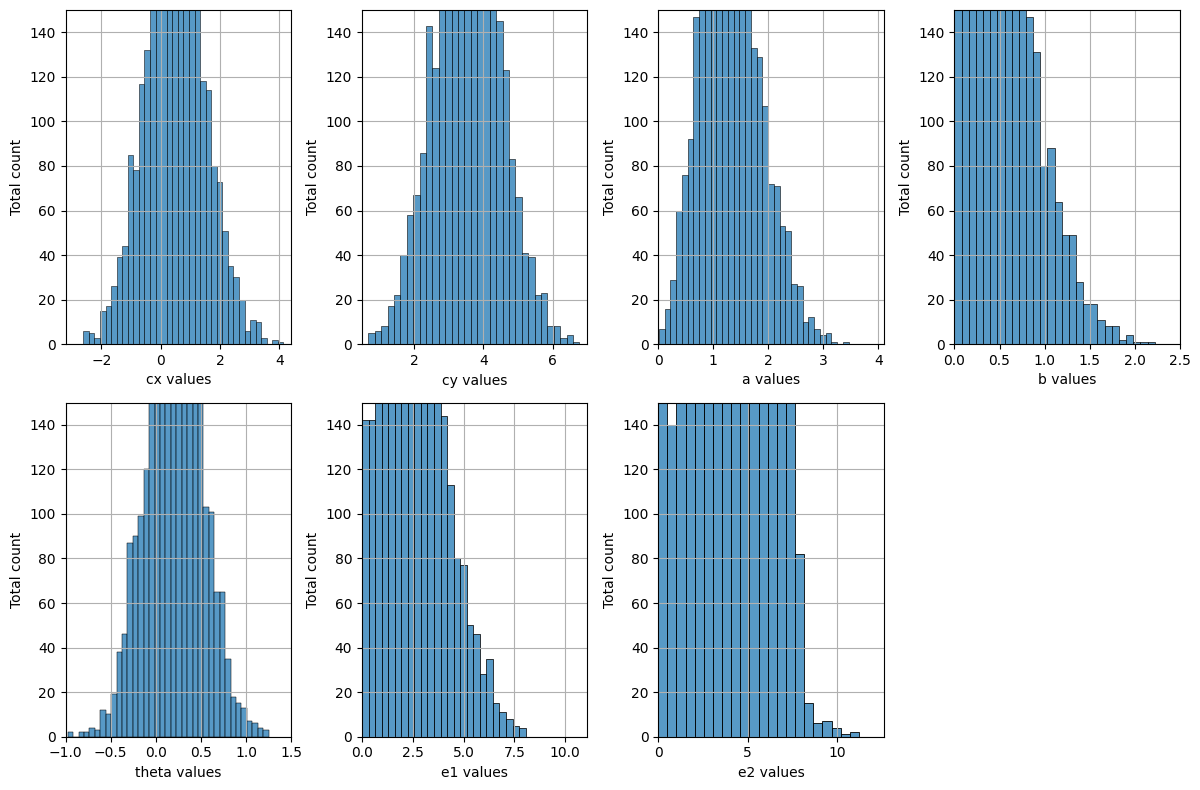

------------- FOLD 3 -------------
        count      mean       std       min       50%        max
cx     2819.0  0.471265  1.001216 -2.827629  0.461380   4.133649
cy     2819.0  3.511407  0.975219  0.426711  3.480840   6.687872
a      2819.0  1.335064  0.561903  0.032099  1.307650   4.032865
b      2819.0  0.545865  0.389533  0.000054  0.484375   2.397364
theta  2819.0  0.190208  0.320230 -0.824384  0.184326   1.312256
e1     2819.0  2.572647  1.600550  0.000099  2.398884  11.031250
e2     2819.0  4.030236  2.243135  0.007117  4.043908  10.745827
fold   2819.0  3.000000  0.000000  3.000000  3.000000   3.000000


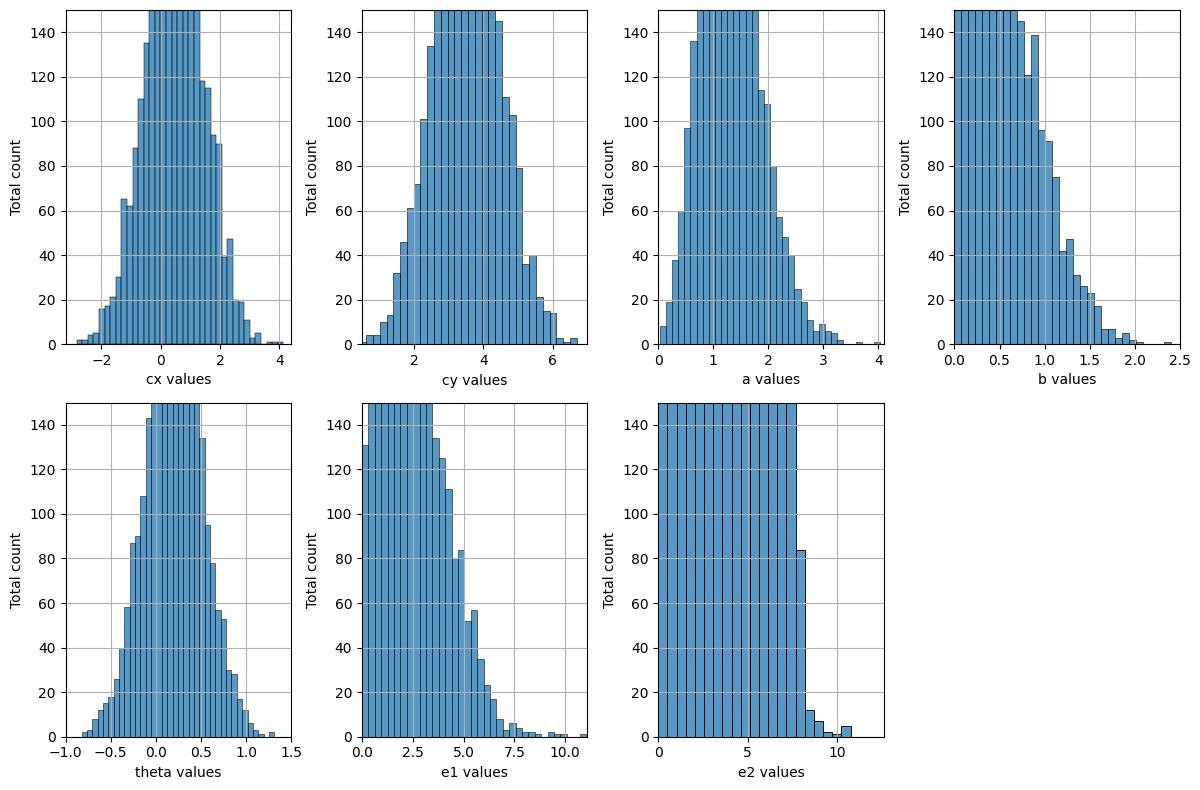

------------- FOLD 4 -------------
        count      mean       std       min       50%        max
cx     2819.0  0.485408  0.993265 -3.102034  0.480676   4.378377
cy     2819.0  3.500255  0.989940  0.752617  3.482210   7.286987
a      2819.0  1.335336  0.562657  0.042182  1.299082   3.801223
b      2819.0  0.545945  0.390333  0.002332  0.475243   2.429068
theta  2819.0  0.209145  0.317730 -0.886144  0.205785   1.244875
e1     2819.0  2.627914  1.588493  0.001776  2.506680   9.010049
e2     2819.0  4.093356  2.249550  0.001481  4.030610  13.292454
fold   2819.0  4.000000  0.000000  4.000000  4.000000   4.000000


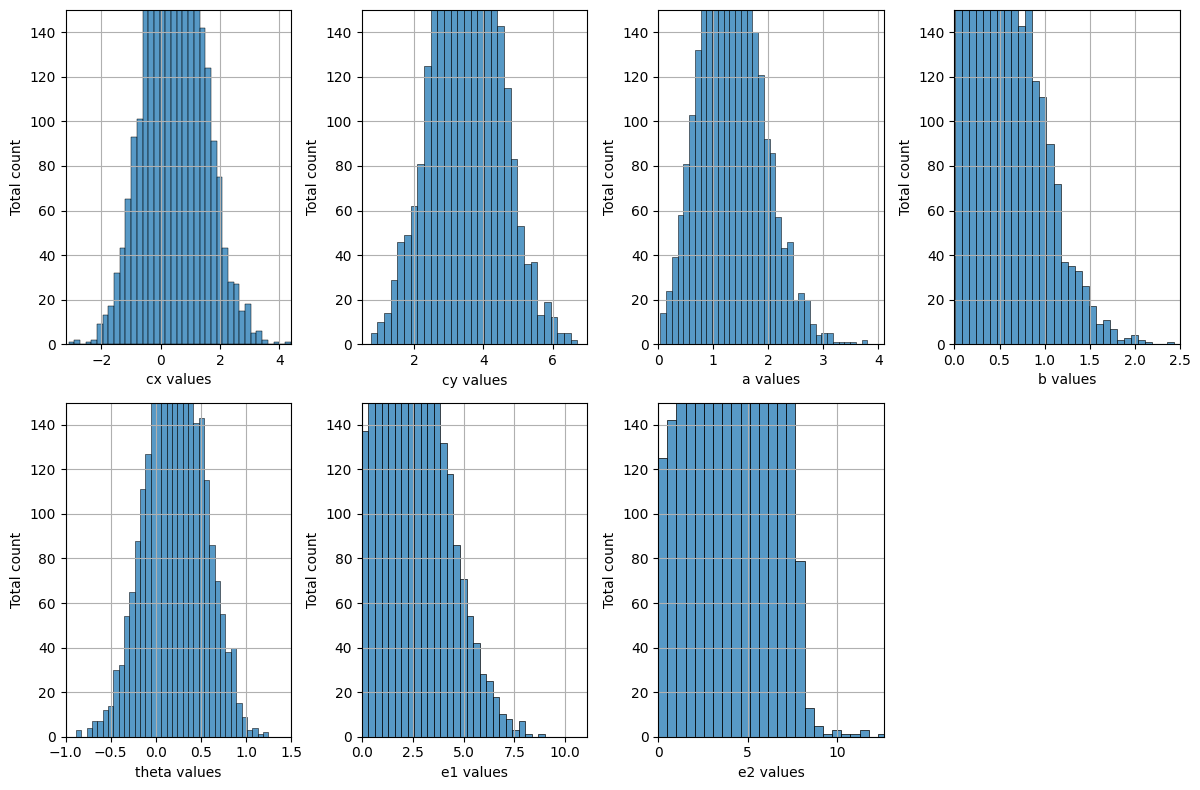

In [30]:
show_distribution = True #Set to true to plot distributions

for i in range(5):
  print(f'------------- FOLD {i} -------------')
  params = y[y['fold'] == i]
  print(params.describe().drop(['25%','75%']).transpose())
  if show_distribution:
    visualize_parameter_distributions(params, 150)

In [31]:
X_train = X[(X['fold'] == 0) | (X['fold'] == 1) | (X['fold'] == 2)]
y_train = y[(y['fold'] == 0) | (y['fold'] == 1) | (y['fold'] == 2)]

X_validation = X[X['fold'] == 3]
y_validation = y[y['fold'] == 3]

X_test = X[X['fold'] == 4]
y_test = y[y['fold'] == 4]

In [32]:
y_train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cx,8457.0,0.499590,1.002303,-3.023943,-0.172792,0.491501,1.172979,4.138670
cy,8457.0,3.524094,0.977459,0.276241,2.842066,3.505322,4.200738,6.764944
a,8457.0,1.337988,0.554534,0.015081,0.931284,1.307906,1.700125,3.851698
b,8457.0,0.545566,0.382603,0.000130,0.236554,0.482042,0.788202,2.219840
theta,8457.0,0.200191,0.317572,-1.009230,-0.014582,0.200739,0.414916,1.435599
e1,8457.0,2.615525,1.583445,0.000006,1.363603,2.460691,3.677624,9.153356
e2,8457.0,4.074245,2.243172,0.000887,2.224144,4.067452,5.932715,13.713040
fold,8457.0,1.000000,0.816545,0.000000,0.000000,1.000000,2.000000,2.000000


In [33]:
y_validation.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cx,2819.0,0.471265,1.001216,-2.827629,-0.208683,0.461380,1.154680,4.133649
cy,2819.0,3.511407,0.975219,0.426711,2.816282,3.480840,4.210627,6.687872
a,2819.0,1.335064,0.561903,0.032099,0.908780,1.307650,1.695623,4.032865
b,2819.0,0.545865,0.389533,0.000054,0.224497,0.484375,0.785580,2.397364
theta,2819.0,0.190208,0.320230,-0.824384,-0.019936,0.184326,0.409256,1.312256
e1,2819.0,2.572647,1.600550,0.000099,1.321869,2.398884,3.575472,11.031250
e2,2819.0,4.030236,2.243135,0.007117,2.181882,4.043908,5.840578,10.745827
fold,2819.0,3.000000,0.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [34]:
y_test.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cx,2819.0,0.485408,0.993265,-3.102034,-0.197548,0.480676,1.158974,4.378377
cy,2819.0,3.500255,0.989940,0.752617,2.807865,3.482210,4.192700,7.286987
a,2819.0,1.335336,0.562657,0.042182,0.937442,1.299082,1.688950,3.801223
b,2819.0,0.545945,0.390333,0.002332,0.234201,0.475243,0.802043,2.429068
theta,2819.0,0.209145,0.317730,-0.886144,0.001611,0.205785,0.422641,1.244875
e1,2819.0,2.627914,1.588493,0.001776,1.365437,2.506680,3.676806,9.010049
e2,2819.0,4.093356,2.249550,0.001481,2.243682,4.030610,5.950488,13.292454
fold,2819.0,4.000000,0.000000,4.000000,4.000000,4.000000,4.000000,4.000000


In [35]:
save_indexes(X_train['data_index'], './utils/train.txt')
save_indexes(X_validation['data_index'], './utils/validation.txt')
save_indexes(X_test['data_index'], './utils/test.txt')